<a href="https://colab.research.google.com/github/YasinnSoylu/Happiness-Ranking-/blob/main/Happiness_Ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib.offsetbox import OffsetImage,AnnotationBbox

import plotly.express as px
import plotly.graph_objects as go

In [24]:
df = pd.read_csv('Happiness.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [25]:
fig = go.Figure(data=go.Choropleth(
    locations=df['Country'], 
    z = df['Happiness Score'].astype(float), 
    locationmode = 'country names', 
    colorscale = 'plasma',
    colorbar_title = "pop",
    hovertext='Country'
))

In [26]:

fig.update_layout(
    title_text = 'Happiness Score in word',title_x=0.5,
    geo_scope='world',
)
fig.show()


In [27]:
fig.update_layout(
    title_text = 'Happiness Score in africa',title_x=0.5,
    geo_scope='africa',
)
fig.show()

fig.update_layout(
    title_text = 'Happiness Score in asia',title_x=0.5,
    geo_scope='asia',
)
fig.show()


fig.update_layout(
    title_text = 'Happiness Score in europe',title_x=0.5,
    geo_scope='europe',
)
fig.show()

fig.update_layout(
    title_text = 'Happiness Score in north america',title_x=0.5,
    geo_scope='north america',
)
fig.show()
fig.update_layout(
    title_text = 'Happiness Score in south america',title_x=0.5,
    geo_scope='south america',
)
fig.show()


In [28]:
sort_df=df.sort_values(by='Happiness Score', ascending=False)
sort_df=df[:20]
sort_df=sort_df.sort_values(by='Economy (GDP per Capita)', ascending=False)


In [29]:
def get_flag(name):
    path = "/content/{}.gif".format(name.title())
    im = plt.imread(path)
    return im

def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.20)
    im.image.axes = ax

    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)

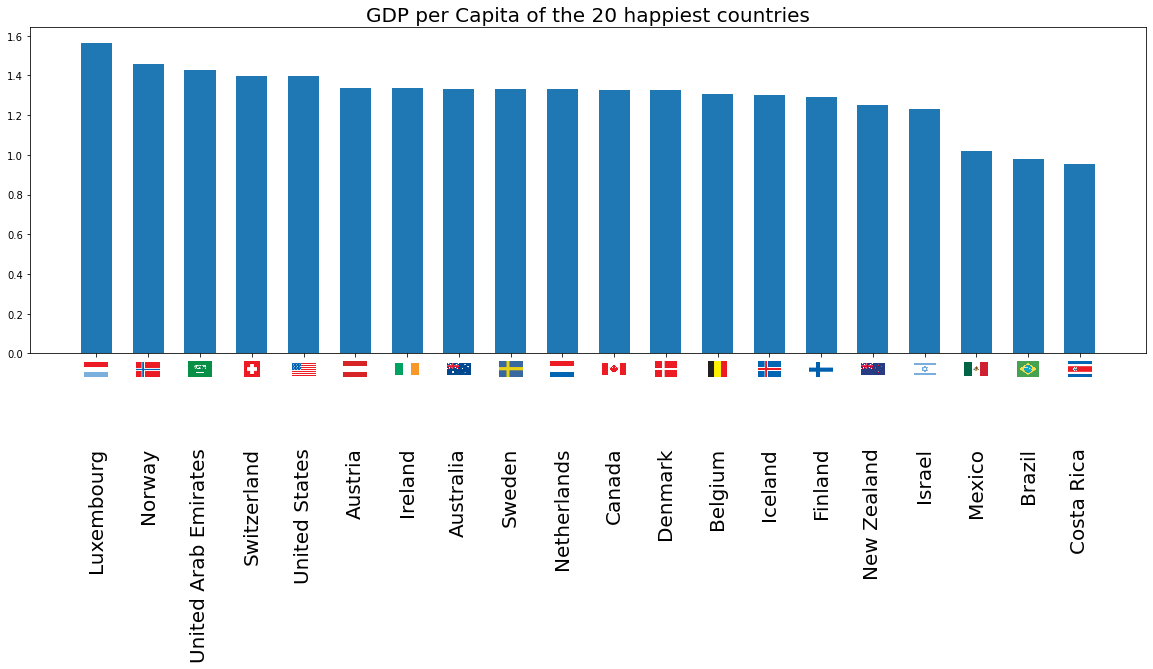

In [30]:


fig, ax = plt.subplots(figsize=(20,6))

ax.bar(range(len(sort_df["Country"])), sort_df["Economy (GDP per Capita)"], width=0.6,align="center")
ax.set_xticks(range(len(sort_df["Country"])))
ax.set_xticklabels(sort_df["Country"],fontsize=20,rotation=90)
ax.tick_params(axis='x', which='major', pad=90)
ax.set_title("GDP per Capita of the 20 happiest countries",fontsize=20)

for i, c in enumerate(sort_df["Country"]):
    offset_image(i, c, ax)

plt.show()

In [32]:
sort_df=df.sort_values(by='Health (Life Expectancy)', ascending=False)
sort_df=df[:20]
sort_df=sort_df.sort_values(by='Health (Life Expectancy)', ascending=False)

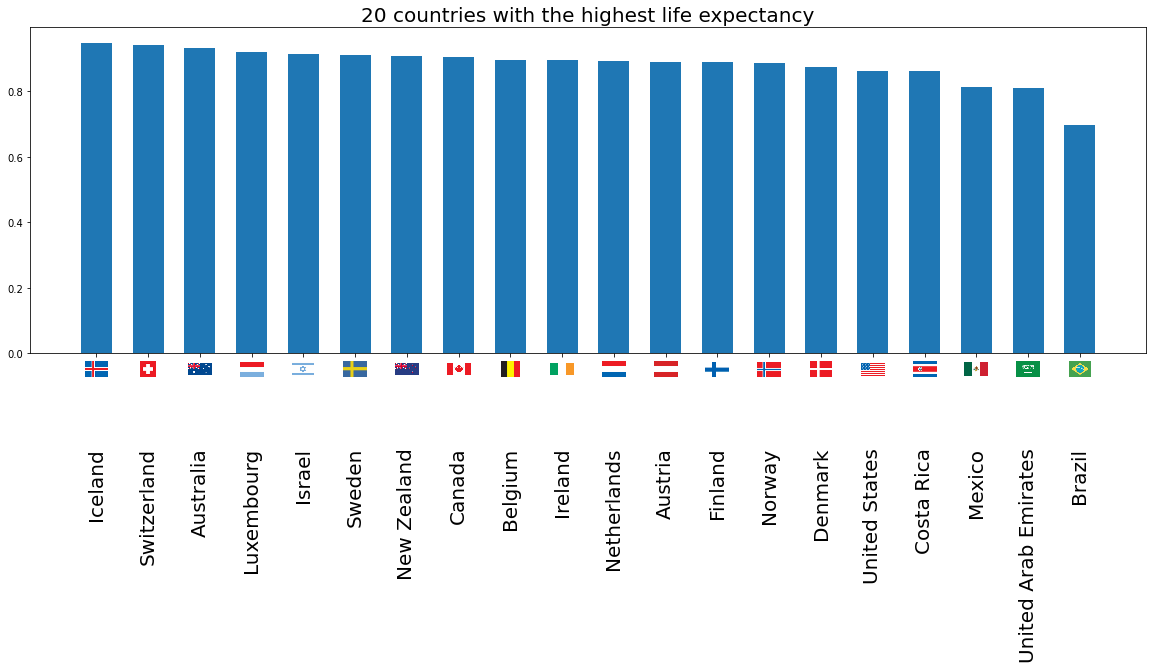

In [33]:
fig, ax = plt.subplots(figsize=(20,6))

ax.bar(range(len(sort_df["Country"])), sort_df["Health (Life Expectancy)"], width=0.6,align="center")
ax.set_xticks(range(len(sort_df["Country"])))
ax.set_xticklabels(sort_df["Country"],fontsize=20,rotation=90)
ax.tick_params(axis='x', which='major', pad=90)
ax.set_title("20 countries with the highest life expectancy",fontsize=20)

for i, c in enumerate(sort_df["Country"]):
    offset_image(i, c, ax)

plt.show()

In [34]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [35]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


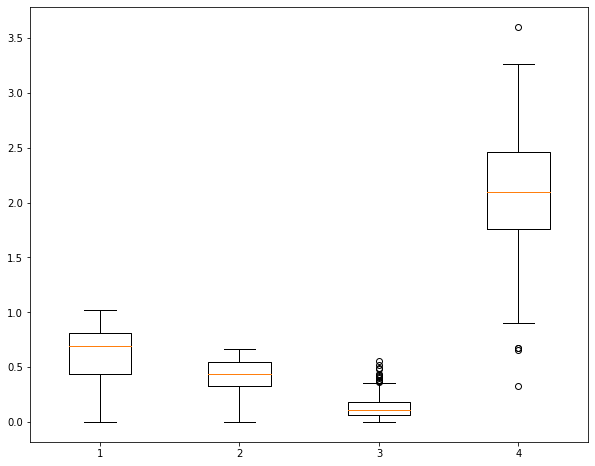

In [36]:
fig = plt.figure(figsize =(10,8))
data = [df['Health (Life Expectancy)'], df['Freedom'], df['Trust (Government Corruption)'], 
        df['Dystopia Residual']]

plt.boxplot(data)
 
# show plot
plt.show()

In [37]:
temp = df.copy()
new_data = temp.drop(['Trust (Government Corruption)'], axis = 1)
new_data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.45811,2.45176


In [38]:
y = new_data['Happiness Rank']
fin_data = new_data.drop(['Region', 'Country', 'Happiness Rank'], axis = 1)

In [39]:
fin_data.columns

Index(['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [40]:
scale = StandardScaler()
data = scale.fit_transform(fin_data)

# Saving the StandardScaler class file
import pickle
pickle.dump(scale, open('HappinessScaler.pickle','wb'))

In [41]:
print(data[0][0])

1.937360050111343


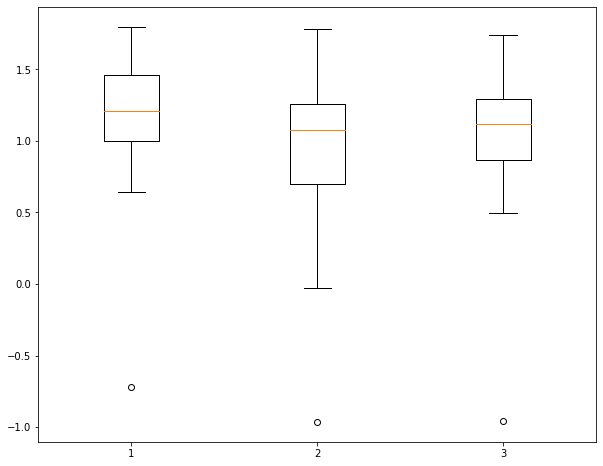

In [42]:
fig = plt.figure(figsize =(10,8))
inserting = [data[4], data[5], data[7]]

plt.boxplot(inserting)
 
# show plot
plt.show()

In [43]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, y, test_size=0.1)

In [44]:
reg = LinearRegression()

reg.get_params(deep = True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [45]:
vari = reg.fit(Xtrain, ytrain)

print(reg.score(Xtrain, ytrain))

0.9850346645395974


In [46]:
# Predicting 
pred = reg.predict(Xtest)

r2_score = reg.score(Xtest,ytest)
print(r2_score)

0.9912537342660318
